**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

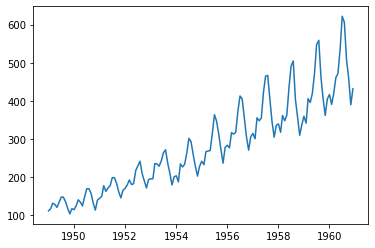

In [3]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

In [4]:
ts = ts.values
ts

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [5]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [8]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.reshape(1,-1))

In [9]:
# SAX transform
n_paa_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

In [10]:
sax_ts_inv.ravel()

array([-1.03643339, -1.03643339, -1.03643339, -1.03643339, -1.03643339,
       -1.03643339, -1.03643339, -1.64485363, -1.64485363, -1.64485363,
       -1.64485363, -1.64485363, -1.64485363, -1.64485363, -1.03643339,
       -1.03643339, -1.03643339, -1.03643339, -1.03643339, -1.03643339,
       -1.03643339, -1.03643339, -1.03643339, -1.03643339, -1.03643339,
       -1.03643339, -1.03643339, -1.03643339, -1.03643339, -1.03643339,
       -1.03643339, -1.03643339, -1.03643339, -1.03643339, -1.03643339,
       -0.67448975, -0.67448975, -0.67448975, -0.67448975, -0.67448975,
       -0.67448975, -0.67448975, -0.67448975, -0.67448975, -0.67448975,
       -0.67448975, -0.67448975, -0.67448975, -0.67448975, -0.38532047,
       -0.38532047, -0.38532047, -0.38532047, -0.38532047, -0.38532047,
       -0.38532047, -0.67448975, -0.67448975, -0.67448975, -0.67448975,
       -0.67448975, -0.67448975, -0.67448975, -0.12566135, -0.12566135,
       -0.12566135, -0.12566135, -0.12566135, -0.12566135, -0.12

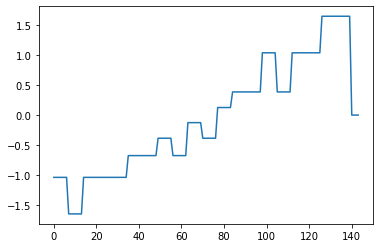

In [11]:
plt.plot(sax_ts_inv.ravel())
plt.show()

In [12]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.6448536269514729: 0,
 -1.0364333894937898: 1,
 -0.6744897501960817: 2,
 -0.38532046640756773: 3,
 -0.12566134685507402: 4,
 0.0: 5,
 0.12566134685507416: 6,
 0.38532046640756773: 7,
 1.0364333894937898: 8,
 1.6448536269514722: 9}

In [13]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [14]:
seq

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7,
       7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5])

In [15]:
from tslearn.generators import random_walks

In [16]:
X = random_walks(n_ts=100, sz=128, d=1)

In [17]:
X = scaler.fit_transform(X)

In [18]:
X_sax = sax.transform(X)
sax_X_inv = sax.inverse_transform(X_sax)

In [19]:
X_seq = list()
for x in sax_X_inv:
    X_seq.append([map_symbols.get(v, -1) for v in x.ravel()])

In [20]:
X_seq[0][:5]

[6, 6, 6, 6, 6]

In [21]:
X_seq[0]

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5]

# Sequential Pattern Mining

In [32]:
!pip install prefixspan

  Using cached prefixspan-0.5.2.tar.gz (10 kB)
Processing /Users/riccardo/Library/Caches/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e/docopt-0.6.2-py2.py3-none-any.whl
  Using cached extratools-0.8.2.1.tar.gz (25 kB)
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11220 sha256=d0fa98675ac2bc0abed18125bb2a4e40c7d540e51c4b6a83290e4e07684936f8
  Stored in directory: /Users/riccardo/Library/Caches/pip/wheels/13/c9/8d/4e8ae7e9db7a435d63161a1e8d4c9bc50795078840a8d948b1
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28868 sha256=b458dacdb292389b8b986cf309460b41cbe8f0b6b60318e81768cc9ba5babf80
  Stored in directory: /Users/riccardo/Library/Caches/pip/wheels/f0/fd/a0/de2750b15ae6ca6f016954f5454f545f7583a1ab71ca2cc35d
Successfully built prefixspan extratools


In [33]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [34]:
db = [
    [0, 1, 2, 3, 4],
    [1, 1, 1, 3, 4],
    [2, 1, 2, 2, 0],
    [1, 1, 1, 2, 2],
]

ps = PrefixSpan(db)

In [35]:
ps.frequent(3)

[(4, [1]), (3, [1, 2]), (3, [2])]

In [36]:
db = [
    [(0, 1), (1, 2), (3, 4), (1)],
    [(1, 1), (1, 3, 4)],
    [(2), (1, 2), (2, 0), (1)],
    [(1, 1), (1, 2), (2), (1)],
]

ps = PrefixSpan(db)

In [37]:
ps.frequent(3)

[(3, [(1, 2)]), (3, [(1, 2), 1]), (3, [1])]

In [38]:
ps.frequent(3, closed=True)

[(3, [(1, 2), 1])]

In [39]:
ps = PrefixSpan(X_seq)

In [40]:
ps.frequent(97)

[(100, [5]), (100, [5, 5]), (100, [5, 5, 5]), (100, [5, 5, 5, 5])]

In [41]:
ps.frequent(97, closed=True)

[(100, [5, 5, 5, 5])]

In [42]:
ps.topk(10)

[(100, [5]),
 (100, [5, 5]),
 (100, [5, 5, 5]),
 (100, [5, 5, 5, 5]),
 (94, [1]),
 (94, [1, 1]),
 (94, [1, 1, 1]),
 (94, [1, 1, 1, 1]),
 (94, [1, 1, 1, 1, 1]),
 (94, [1, 1, 1, 1, 1, 1])]

In [43]:
ps.topk(10, closed=True)

[(100, [5, 5, 5, 5]),
 (94, [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5]),
 (90, [-1, -1, -1, -1, -1, -1, -1, 5, 5, 5, 5]),
 (90, [2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5]),
 (89, [9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5]),
 (86, [3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5]),
 (86, [8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5]),
 (85, [0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5]),
 (83, [4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]),
 (81, [6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5])]